# Surprise Housing Prediction Assignment


### Performed by - Rohit Lal

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

from sklearn.linear_model import ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Changing default display options for better visibility of data
pd.options.display.max_colwidth = 255
pd.options.display.max_rows=225

## Reading Dataset

In [3]:
# reading the dataset
df = pd.read_csv("train.csv")

In [4]:
# Checking shape of the datset
df.shape

(1460, 81)

In [5]:
# Checking column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We have in total 81 columns which comprises of categorical & numerical columns

In [6]:
# viewing head of dataframe, i.e, first 5 rows.
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Cleaning Data

### Checking duplicate columns

In [7]:
df.drop_duplicates().shape

(1460, 81)

There are no duplicate rows in the data.

### Checking for missing values in columns

In [8]:
def print_null_statistics(df):
    # Checking for count and percentage of null values in all columns of the dataframe.
    total_null = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Total'])
    percentage_null = pd.DataFrame(round(100*(df.isnull().sum()/df.shape[0]),2).sort_values(ascending=False)\
                              ,columns=['Percentage'])
    return pd.concat([total_null, percentage_null], axis = 1)

In [9]:
# Checking % missing values & count of missing values for each column
print_null_statistics(df)

,Total,Percentage
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


##### Following columns having null values has a physical significance in real world, so we can't drop the null entries. Instead we will create a new category "Not Present" for these columns

In [10]:
null_meaningful_cols = [
    "Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", 
    "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"
]

In [11]:
for col in null_meaningful_cols:
    df[col].fillna("Not Present", inplace=True)

In [12]:
print_null_statistics(df)

,Total,Percentage
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrType,8,0.55
MasVnrArea,8,0.55
Electrical,1,0.07
SalePrice,0,0.00
ExterCond,0,0.00
RoofStyle,0,0.00
RoofMatl,0,0.00
Exterior1st,0,0.00


`LotFrontage` columns has 17% missing data. It will not be relevant to impute the data. So let's drop the column.

Also, dropping `GarageYrBlt` as imputing data will not be meaningful.

In [13]:
df.drop("LotFrontage", axis=1, inplace=True)
df.drop("GarageYrBlt", axis=1, inplace=True)

In [14]:
# dropping remaning null rows
df.dropna(inplace=True)

In [15]:
print_null_statistics(df)

,Total,Percentage
SalePrice,0,0.0
Foundation,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
BsmtQual,0,0.0


In [16]:
# Removing identifier field
df.drop("Id", axis=1, inplace=True)

### Checking for single valued columns

In [17]:
# Checking for single valued columns.
df.nunique().sort_values()

Street              2
CentralAir          2
Utilities           2
PavedDrive          3
Alley               3
HalfBath            3
LandSlope           3
BsmtHalfBath        3
BsmtFullBath        4
PoolQC              4
GarageFinish        4
Fireplaces          4
ExterQual           4
FullBath            4
LandContour         4
LotShape            4
KitchenAbvGr        4
KitchenQual         4
MasVnrType          4
Electrical          5
GarageCars          5
BsmtExposure        5
BsmtCond            5
BsmtQual            5
HeatingQC           5
ExterCond           5
LotConfig           5
BldgType            5
Fence               5
YrSold              5
MiscFeature         5
MSZoning            5
FireplaceQu         6
SaleCondition       6
GarageQual          6
Heating             6
RoofStyle           6
Foundation          6
GarageCond          6
BsmtFinType2        7
BsmtFinType1        7
GarageType          7
Functional          7
PoolArea            8
HouseStyle          8
RoofMatl  

No single-valued columns are present, which is good.

### Creating derived features

In [18]:
# Counting number of years till today for the date columns
df['DiffYearBuilt'] = pd.datetime.now().year - df['YearBuilt']
df['DiffYearRemodAdd'] = pd.datetime.now().year - df['YearRemodAdd']
df['DiffYrSold'] = pd.datetime.now().year - df['YrSold']

In [19]:
# dropping the original year columns
df.drop("YearBuilt", axis=1, inplace=True)
df.drop("YearRemodAdd", axis=1, inplace=True)
df.drop("YrSold", axis=1, inplace=True)

## EDA

In [20]:
def draw_count_plot(data_df, col_name):
    plt.figure(figsize=(10, 5))
    p = sns.countplot(x=col_name,data=data_df)    
    plt.show()

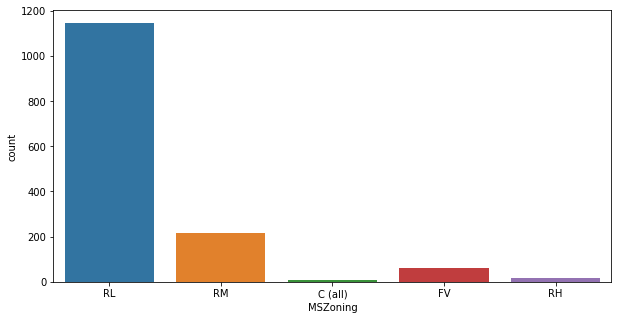

In [21]:
draw_count_plot(col_name='MSZoning',data_df=df)

- Most houses belong to `Residential Low Density` zone

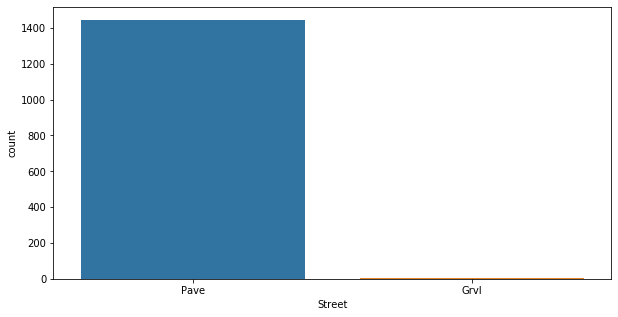

In [22]:
draw_count_plot(col_name='Street',data_df=df)

- Most houses have `Paved` road access.

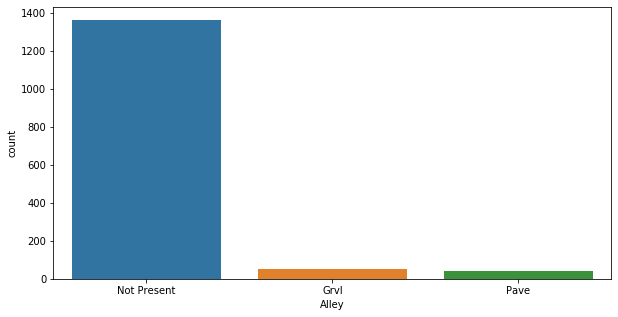

In [23]:
draw_count_plot(col_name='Alley',data_df=df)

- Alley access is quite similar in number for both `Gravel` & `Paved` 

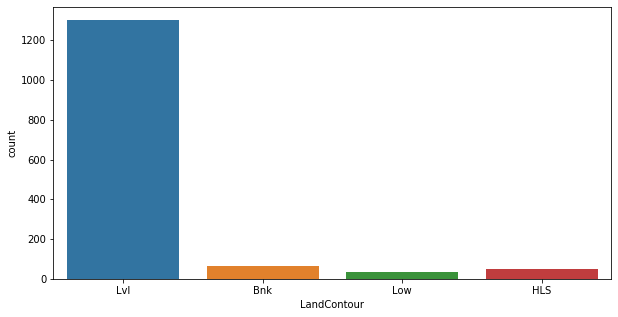

In [24]:
draw_count_plot(col_name='LandContour',data_df=df)

- Majority of flats are `flat level`

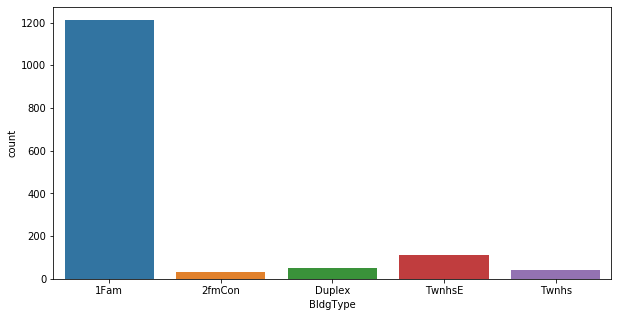

In [25]:
draw_count_plot(col_name='BldgType',data_df=df)

- Majority houses are `single family` house.

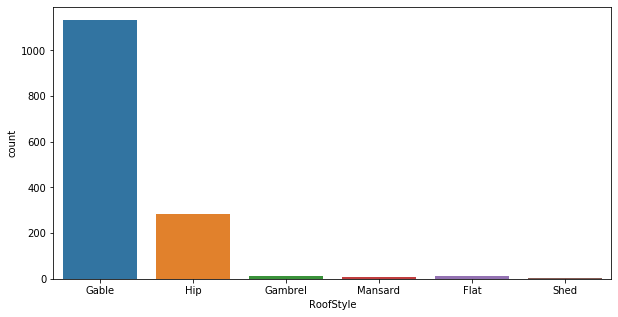

In [26]:
draw_count_plot(col_name='RoofStyle',data_df=df)

- Most houses have `Gable` roof style followed by `Hip` being the 2nd most common roof style.

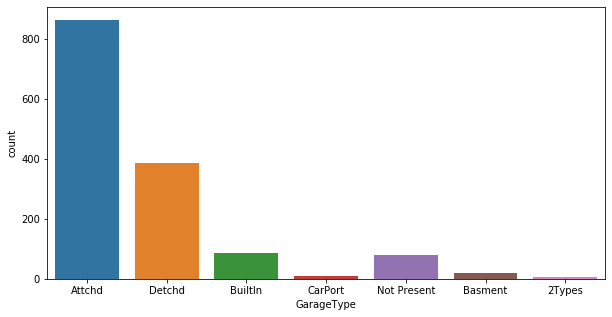

In [27]:
draw_count_plot(col_name='GarageType',data_df=df)

- `Attached` garages are most common followed by `dettached` and `bulit in`

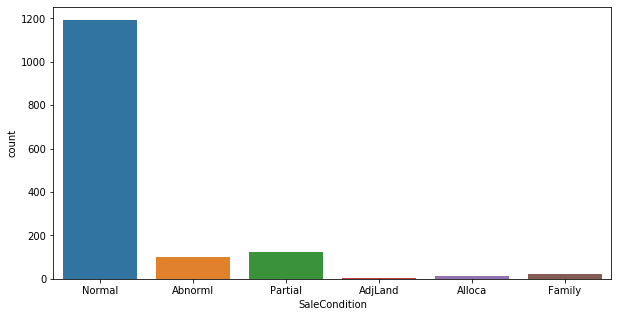

In [28]:
draw_count_plot(col_name='SaleCondition',data_df=df)

- Most sales conditions are `Normal sale`, with some `Partial sales` followed by a few `Abnormal sales`

In [29]:
def draw_scatter_plot(col1_label, col2_label, col3_label, data_df):
        
    plt.figure(figsize = (15, 6))
    
    ax = plt.subplot(1,2,1)
    sns.scatterplot(x=col1_label, y=col3_label, data=data_df, ax= ax);
    plt.title('{} vs {}'.format(col1_label, col3_label), fontsize=18)
    plt.ylabel(col3_label, fontsize=15)
    plt.xlabel(col1_label, fontsize=15)

    ax = plt.subplot(1,2,2)
    sns.scatterplot(x=col2_label, y=col3_label, data=data_df, ax= ax);
    plt.title('{} vs {}'.format(col2_label, col3_label), fontsize=18)
    plt.ylabel(col3_label, fontsize=15)
    plt.xlabel(col2_label, fontsize=15)

    plt.show()

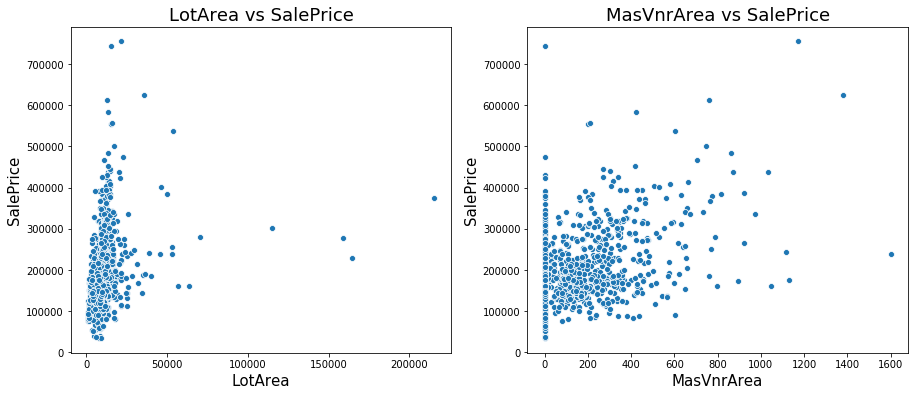

In [30]:
draw_scatter_plot(col1_label='LotArea', col2_label='MasVnrArea', col3_label='SalePrice', data_df=df)

- As `lot area` increase, `Sales price` increases in general.
- As `Masonry area` increase, `Sales price` increases in general.

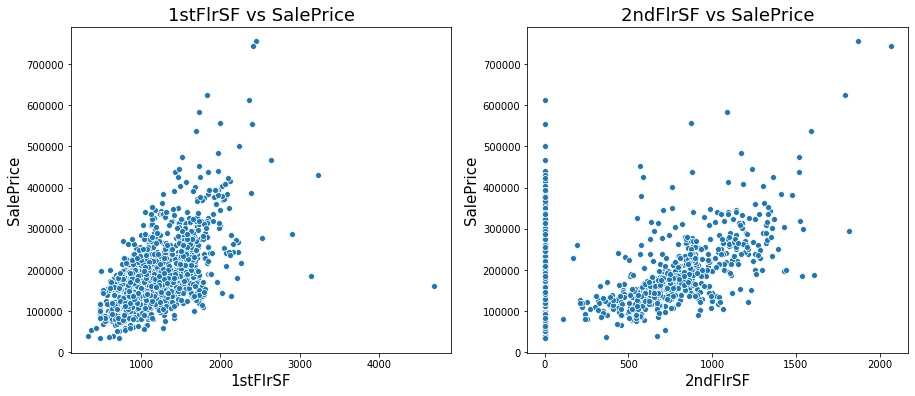

In [31]:
draw_scatter_plot(col1_label='1stFlrSF', col2_label='2ndFlrSF', col3_label='SalePrice', data_df=df)

- `Square feet area for both 1st & 2nd floor` is linearly dependent on the `Sales Price`.
- As sq feet area increases, `Sales Price` increases.

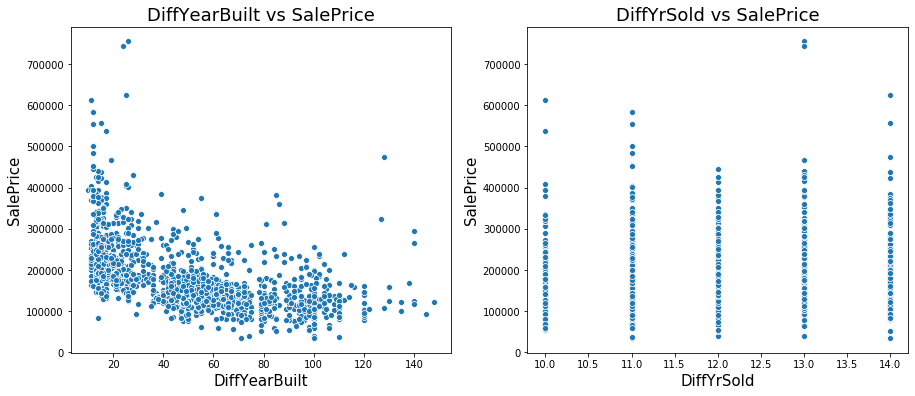

In [32]:
draw_scatter_plot(col1_label='DiffYearBuilt', col2_label='DiffYrSold', col3_label='SalePrice', data_df=df)

- Not very clear relationship in `Year Built` & `Sales Price`. 

In [33]:
def draw_box_plot(col1_label, col2_label, data_df):
    plt.figure(figsize = (12, 6))
    sns.boxplot(x=col1_label, y=col2_label, data=data_df)
    plt.title('{} vs {}'.format(col1_label, col2_label), fontsize=18)
    plt.ylabel(col2_label, fontsize=15)
    plt.xlabel(col1_label, fontsize=15)
    plt.show()

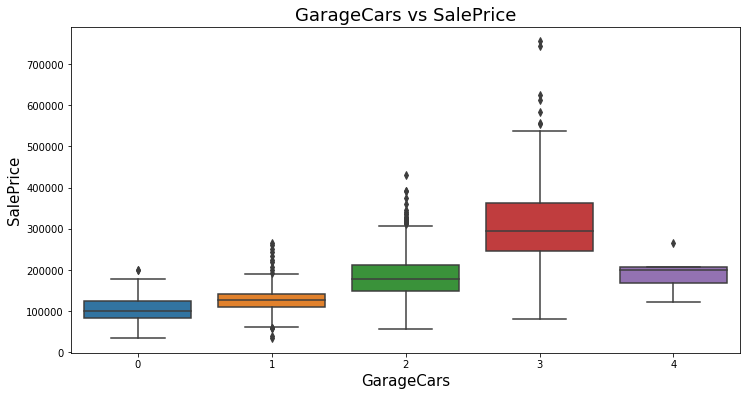

In [34]:
draw_box_plot('GarageCars', 'SalePrice', df)

- As `Garage size` increases, the `SalePrice` increase, with exception of `Garage size` of 4 cars, for which the SalePrice is strangely lesser.

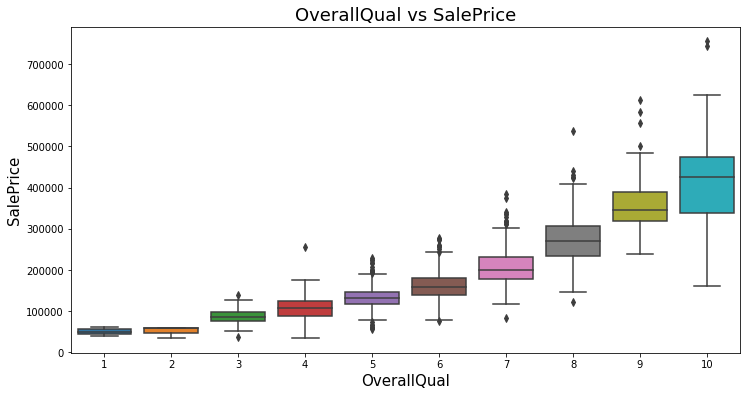

In [35]:
draw_box_plot(col1_label='OverallQual', col2_label='SalePrice', data_df=df)

- As `Overall Quality` increases, `Sales Price` increases.

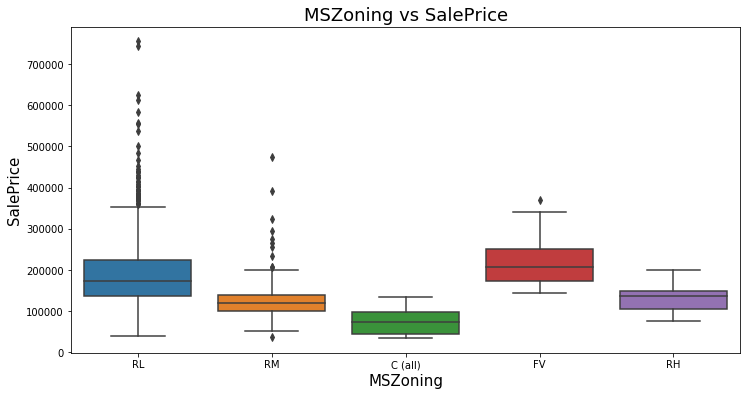

In [36]:
draw_box_plot(col1_label='MSZoning', col2_label='SalePrice', data_df=df)

- `Floating Village Resedential` as most high priced followed by `Residential Low Density` and `Residential High Density`.

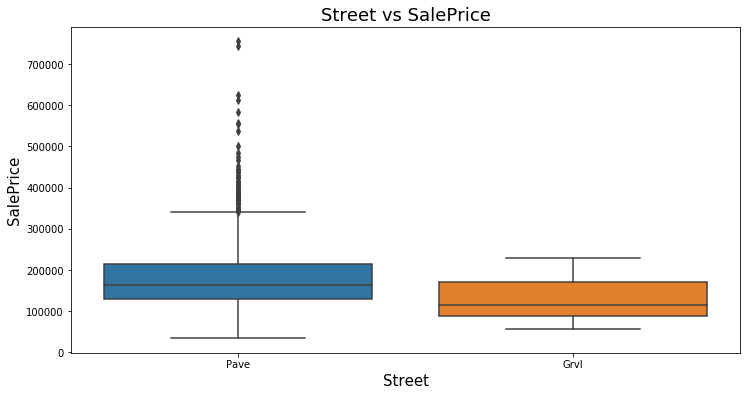

In [37]:
draw_box_plot(col1_label='Street', col2_label='SalePrice', data_df=df)

- `Paved` street homes are in general high priced than the `Gravel` ones.

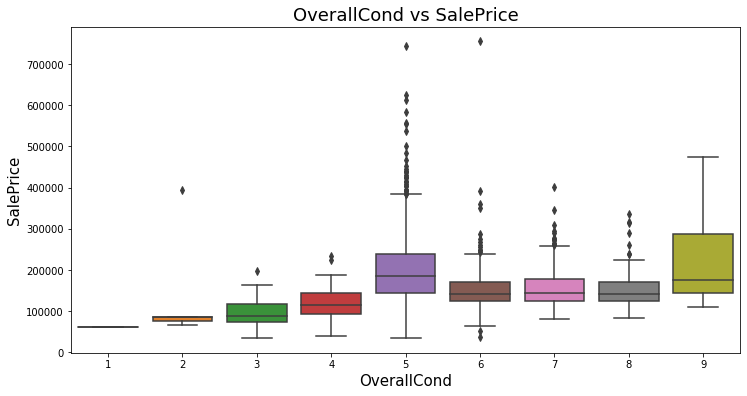

In [38]:
draw_box_plot(col1_label='OverallCond', col2_label='SalePrice', data_df=df)

- In general, as `Overall Condition` of house is increasing, the `Sales Price` is increasing or remains same.

### Collectively plotting the numerical and categorical columns

#### Numerical columns

In [39]:
numerical_cols = [
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'DiffYearBuilt', 'DiffYearRemodAdd',
    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
    'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'MiscVal',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'GarageCars', 'GarageArea',
    'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2'
]

In [40]:
# drawing joint plot to visualize
def draw_jointplot(i, col_x, col_y):
    plt.figure(figsize=(10, 5))
    p = sns.jointplot(x=col_x, y=col_y, data=df)
    plt.show()

<Figure size 720x360 with 0 Axes>

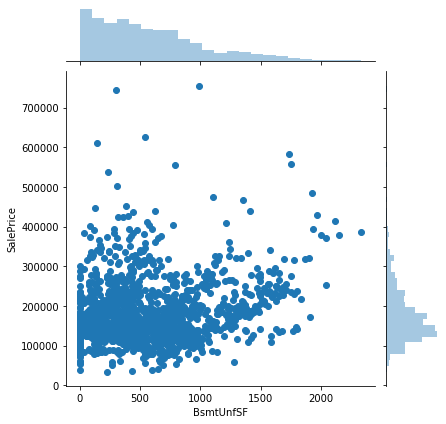

<Figure size 720x360 with 0 Axes>

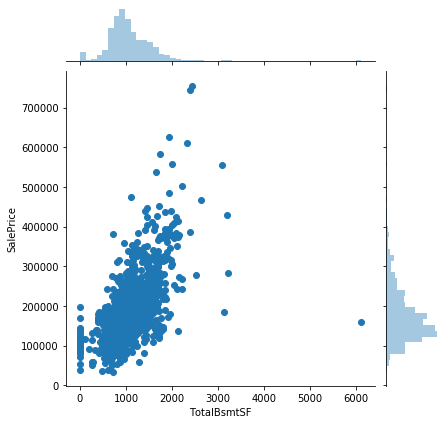

<Figure size 720x360 with 0 Axes>

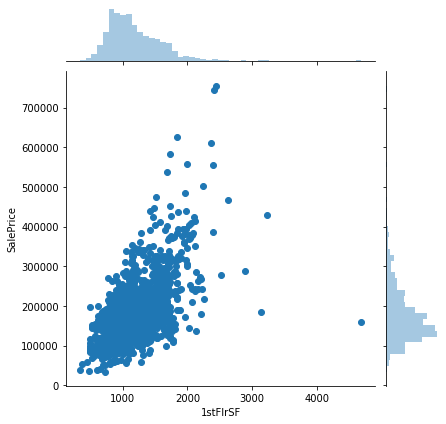

<Figure size 720x360 with 0 Axes>

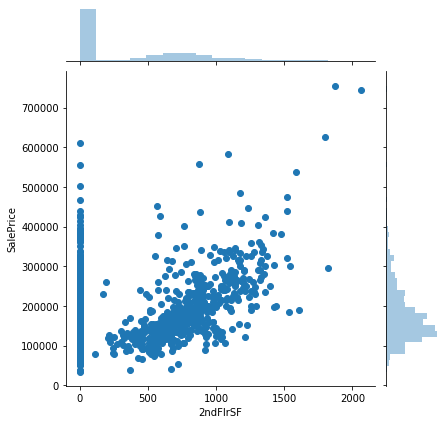

<Figure size 720x360 with 0 Axes>

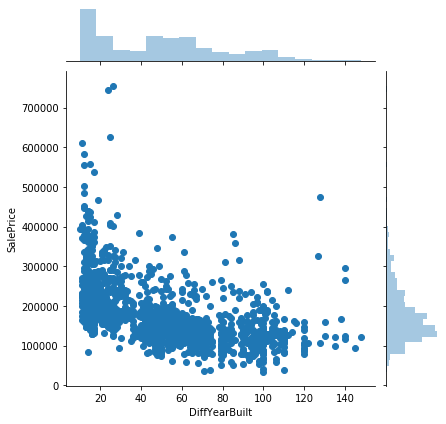

<Figure size 720x360 with 0 Axes>

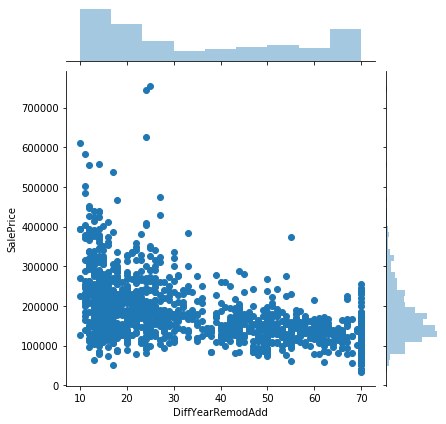

<Figure size 720x360 with 0 Axes>

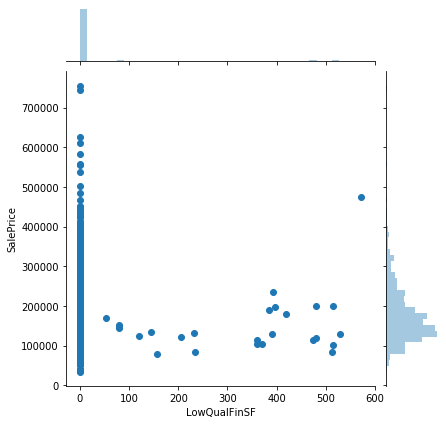

<Figure size 720x360 with 0 Axes>

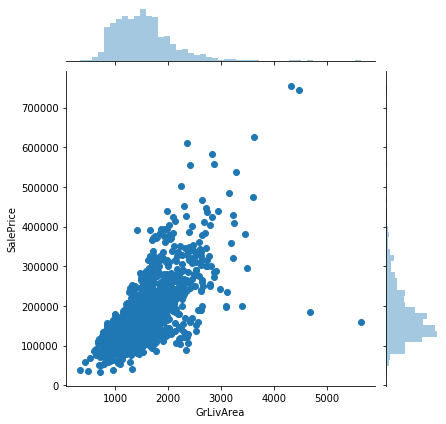

<Figure size 720x360 with 0 Axes>

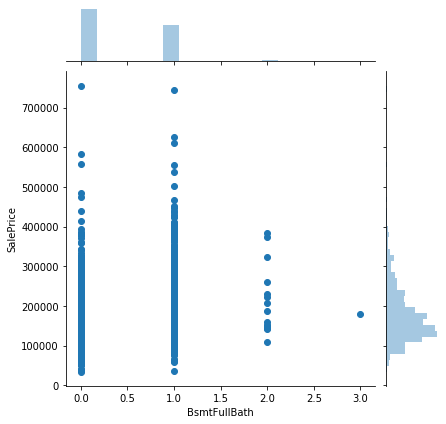

<Figure size 720x360 with 0 Axes>

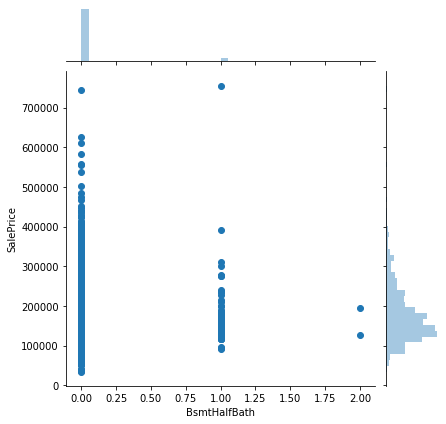

<Figure size 720x360 with 0 Axes>

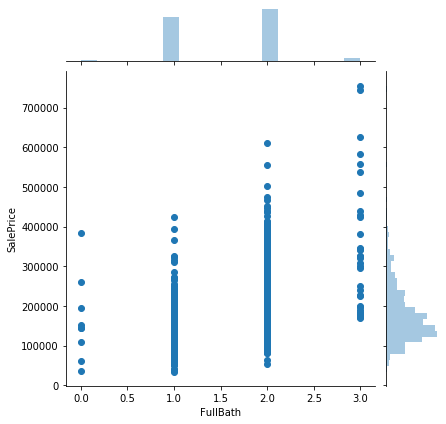

<Figure size 720x360 with 0 Axes>

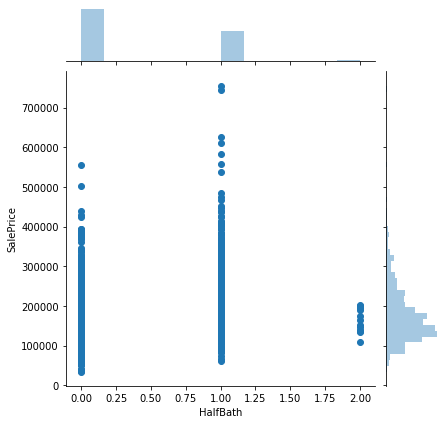

<Figure size 720x360 with 0 Axes>

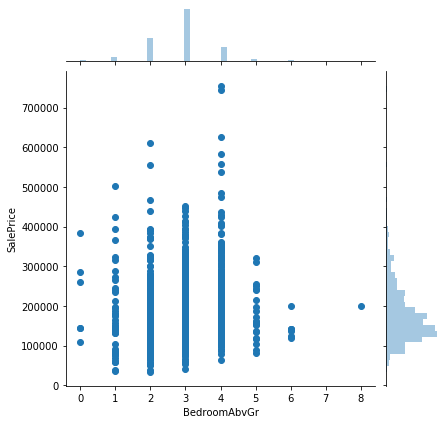

<Figure size 720x360 with 0 Axes>

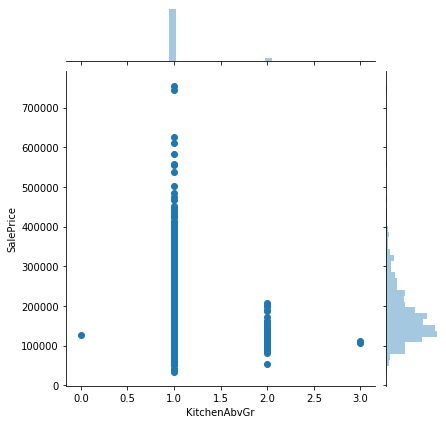

<Figure size 720x360 with 0 Axes>

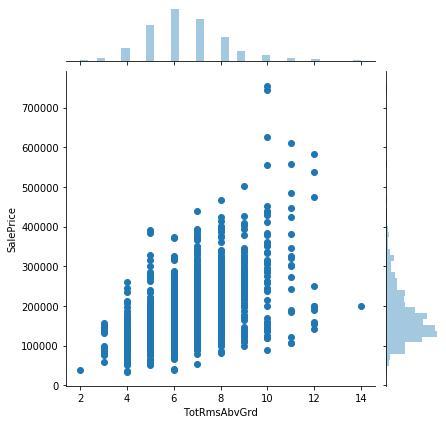

<Figure size 720x360 with 0 Axes>

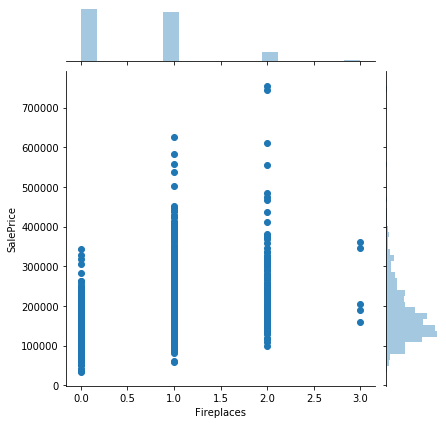

<Figure size 720x360 with 0 Axes>

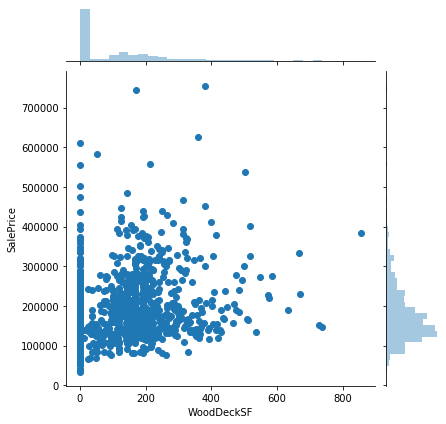

<Figure size 720x360 with 0 Axes>

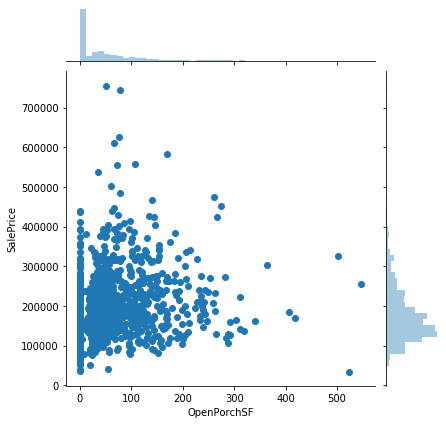

<Figure size 720x360 with 0 Axes>

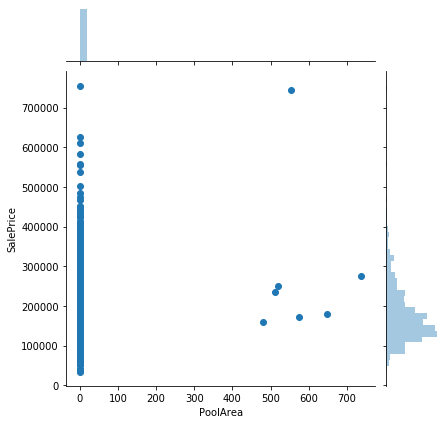

<Figure size 720x360 with 0 Axes>

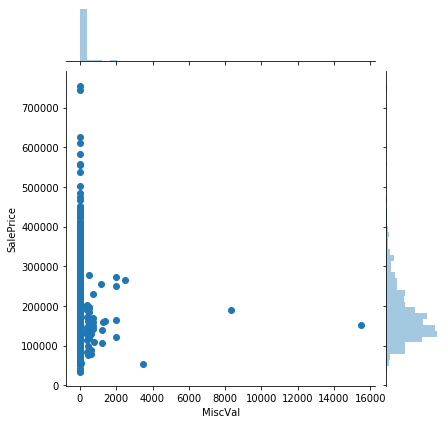

<Figure size 720x360 with 0 Axes>

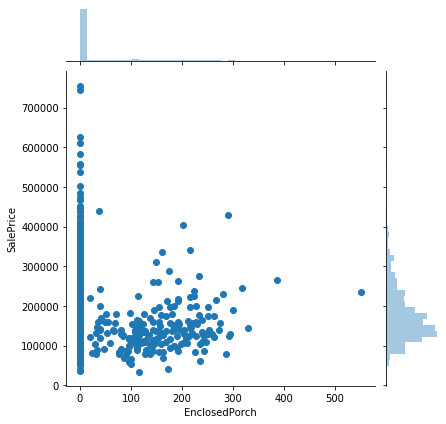

<Figure size 720x360 with 0 Axes>

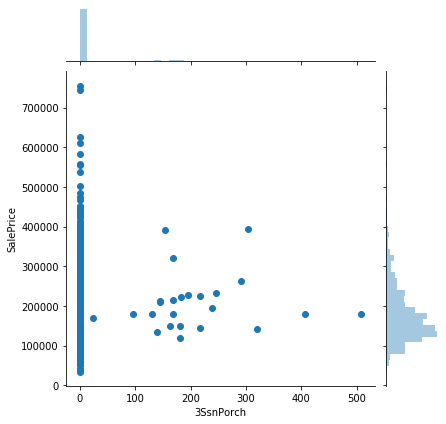

<Figure size 720x360 with 0 Axes>

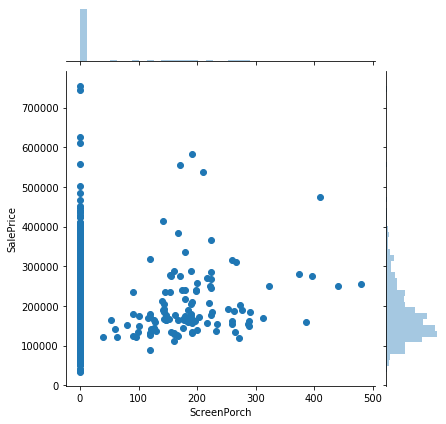

<Figure size 720x360 with 0 Axes>

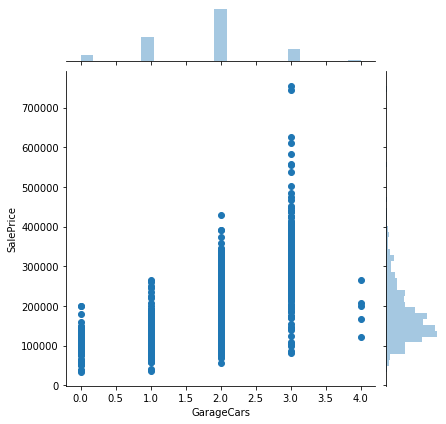

<Figure size 720x360 with 0 Axes>

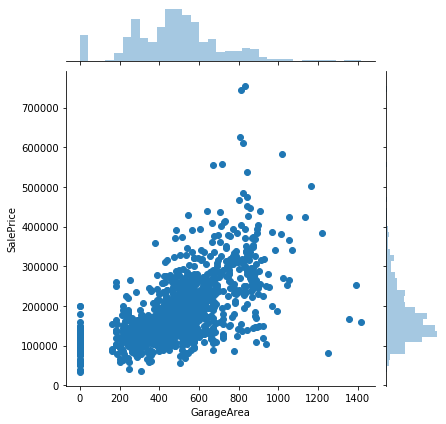

<Figure size 720x360 with 0 Axes>

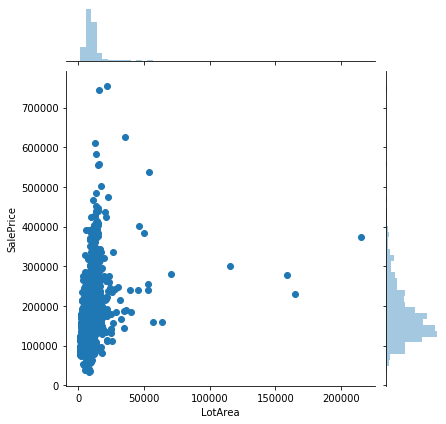

<Figure size 720x360 with 0 Axes>

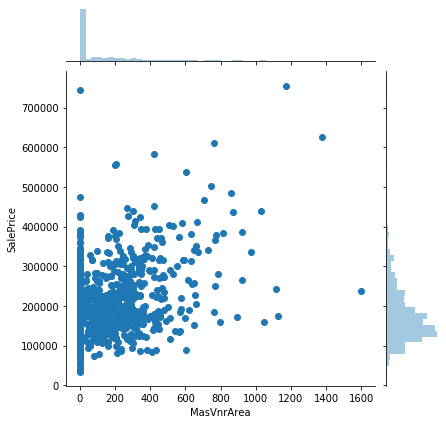

<Figure size 720x360 with 0 Axes>

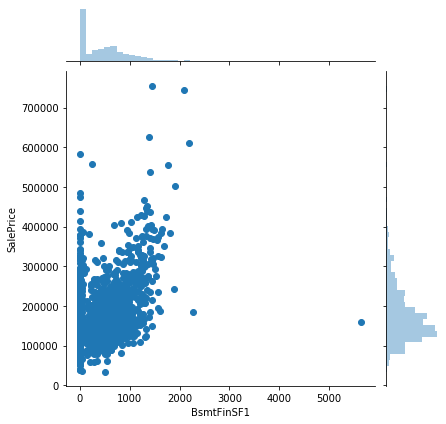

<Figure size 720x360 with 0 Axes>

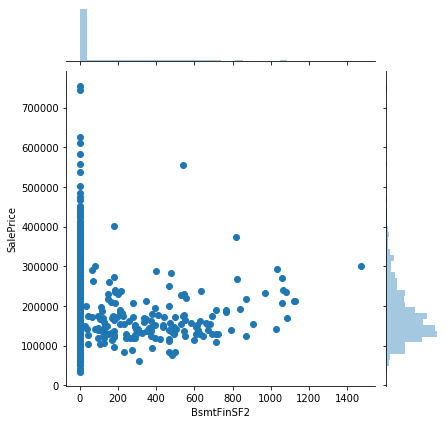

In [41]:
for index, col_name in enumerate(numerical_cols):
    draw_jointplot(index, col_name, 'SalePrice')

##### Categorical columns 

In [42]:
categorical_cols = [
    'MSSubClass', 'MSZoning', 'Street', 'LotConfig', 'LandSlope', 'Neighborhood', 
    'LotShape', 'LandContour', 'Utilities', 'Condition1', 'Condition2', 'BldgType', 'OverallCond',
    'HouseStyle', 'OverallQual', 'Exterior1st', 'Exterior2nd', 'RoofStyle', 'RoofMatl', 
    'Foundation', 'BsmtQual', 'BsmtCond', 'MasVnrType', 'FireplaceQu','PoolQC', 'Fence', 'MiscFeature', 
    'Alley', 'ExterQual', 'ExterCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
    'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageQual',
    'GarageCond', 'GarageType', 'GarageFinish', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition', 
]

In [43]:
# drawing boxplot to visualize
def draw_box_plot(i, col_x, col_y):
    plt.figure(i, figsize=(10, 5))
    sns.boxplot(x=col_x, y=col_y, data=df)
    plt.show()

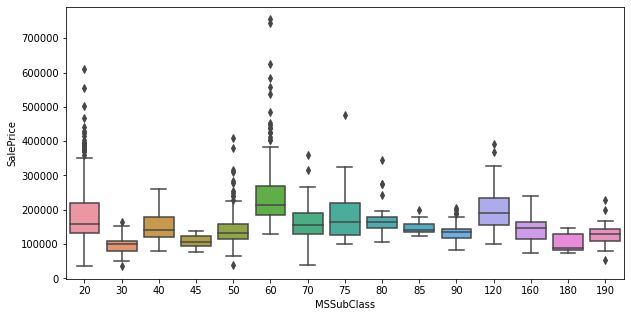

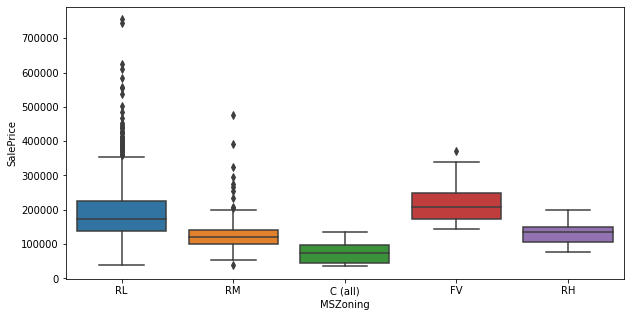

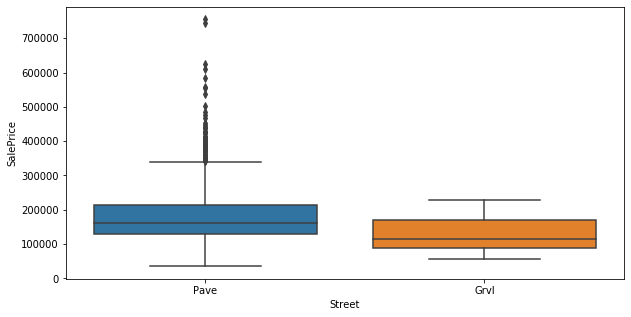

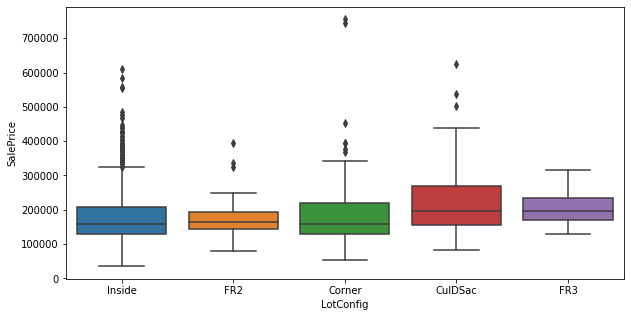

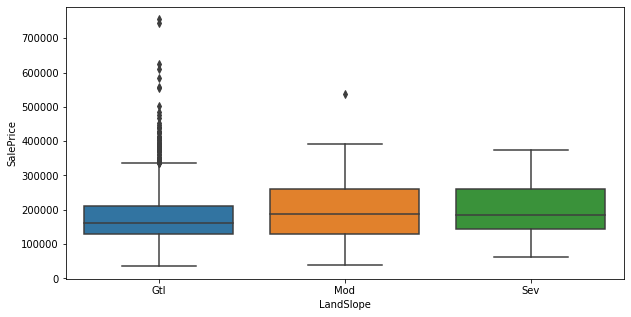

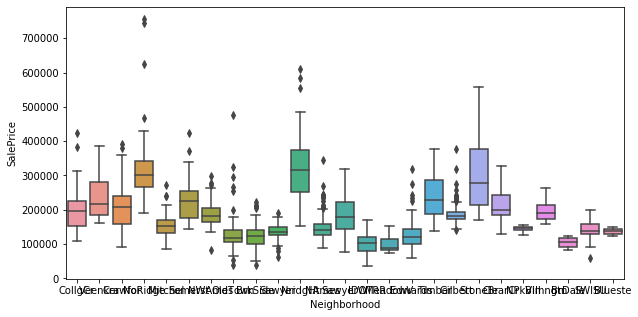

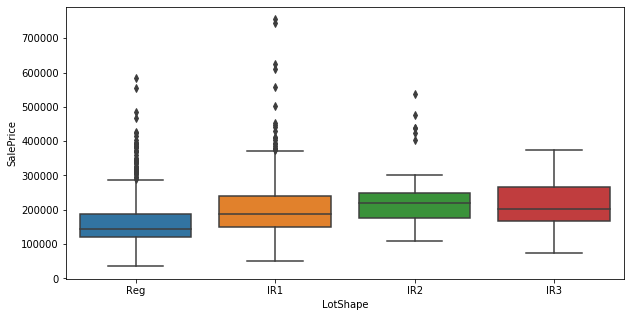

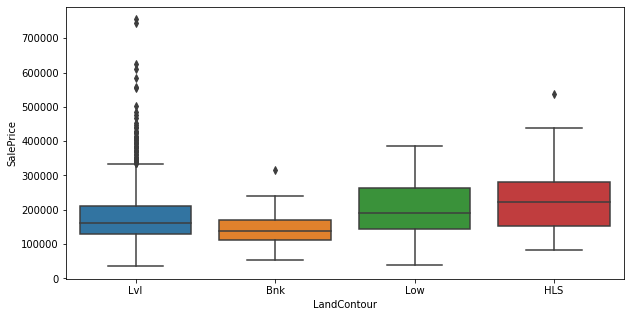

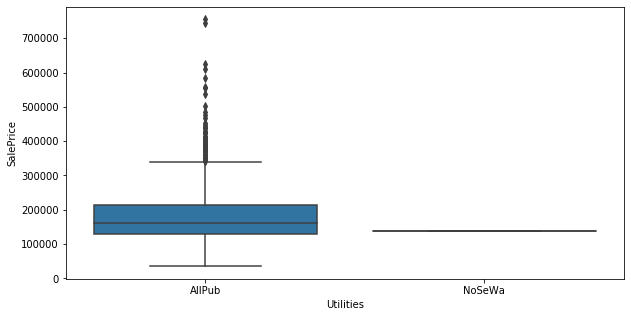

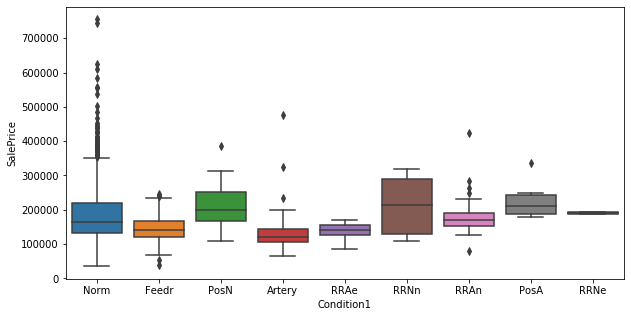

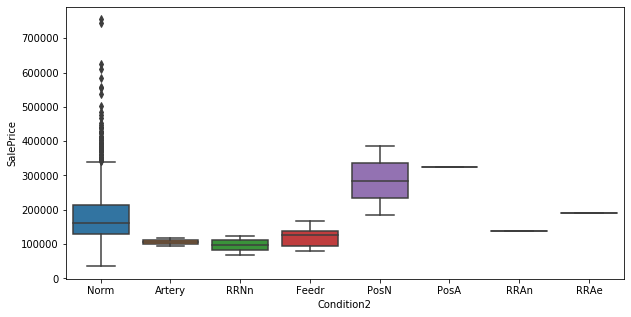

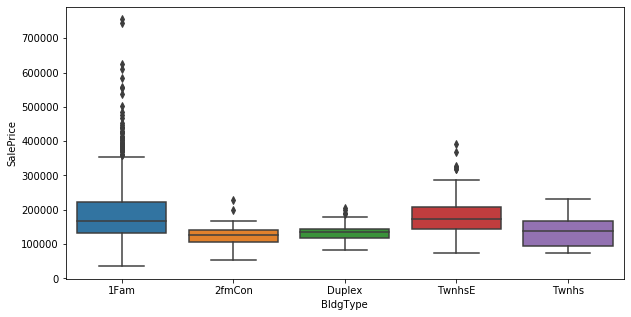

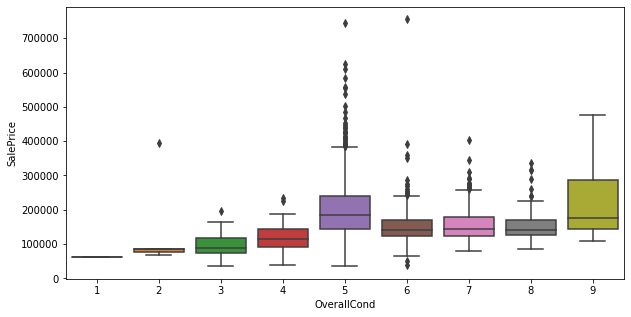

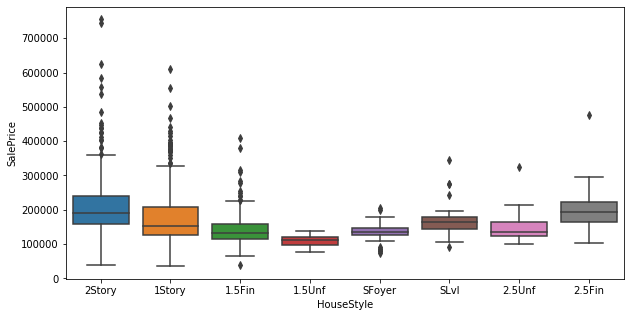

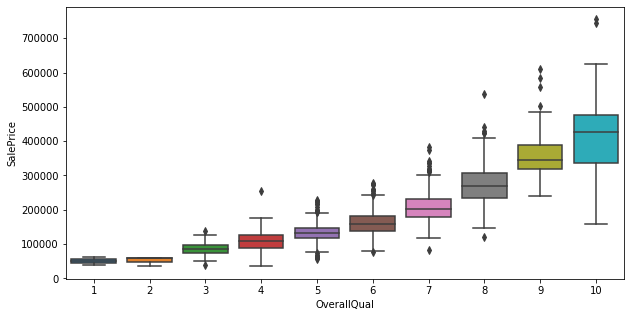

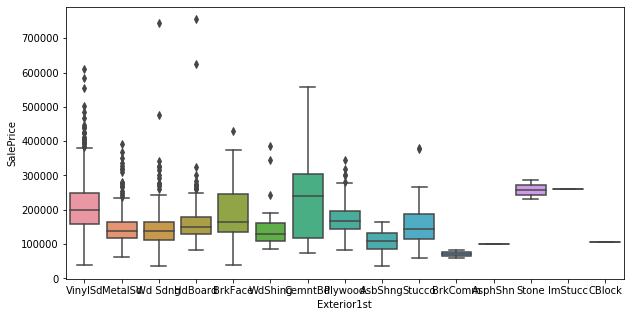

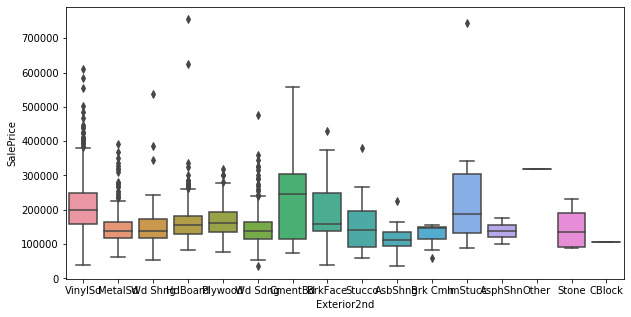

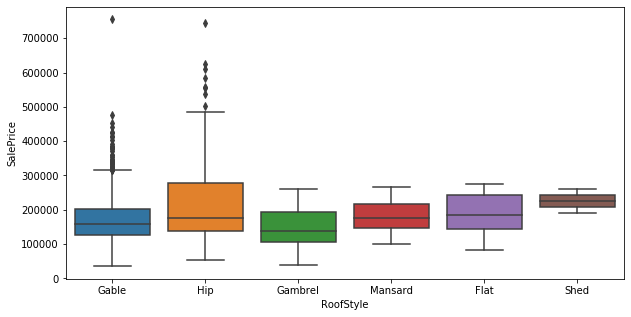

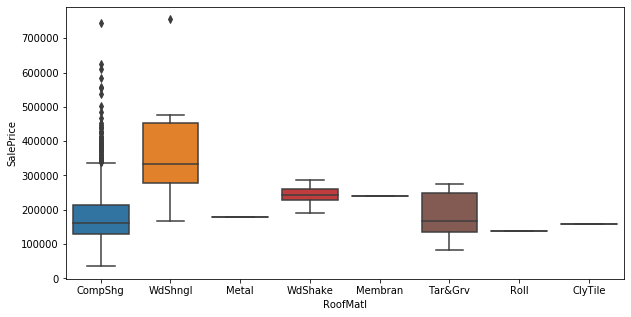

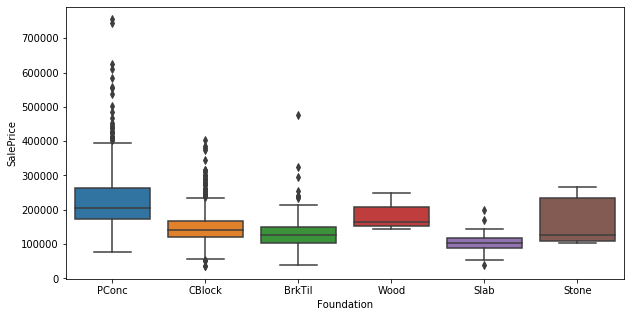

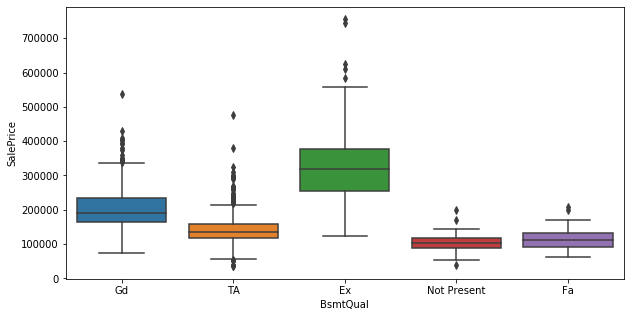

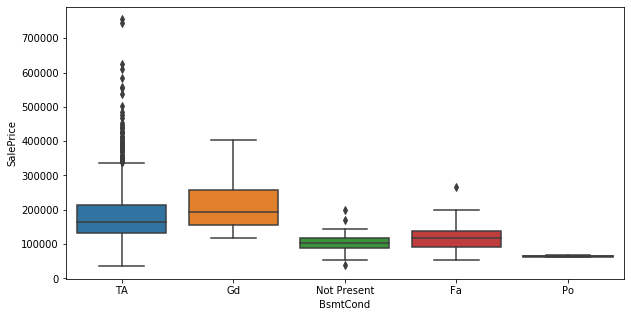

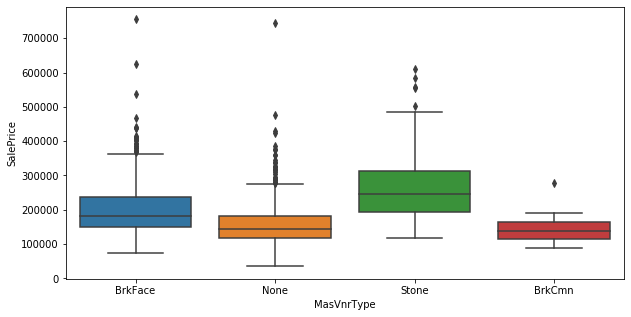

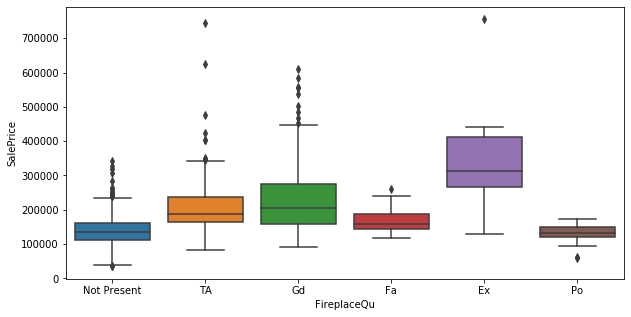

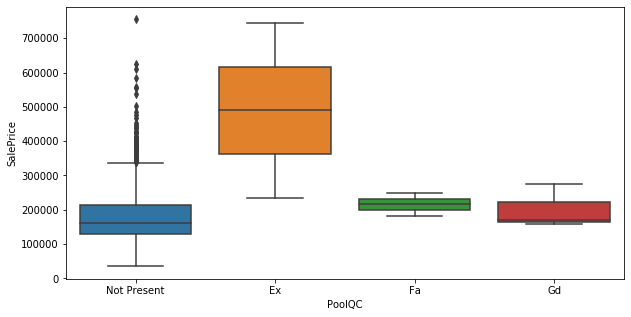

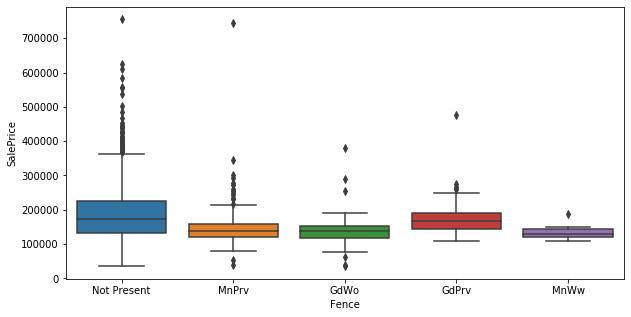

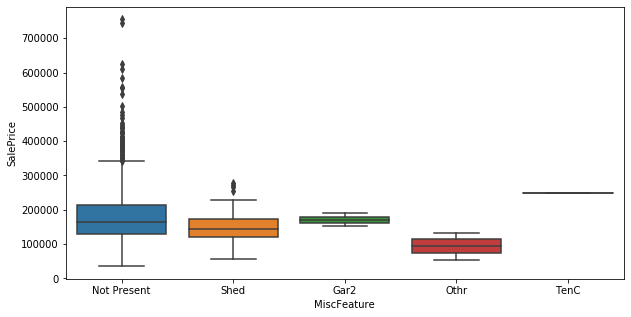

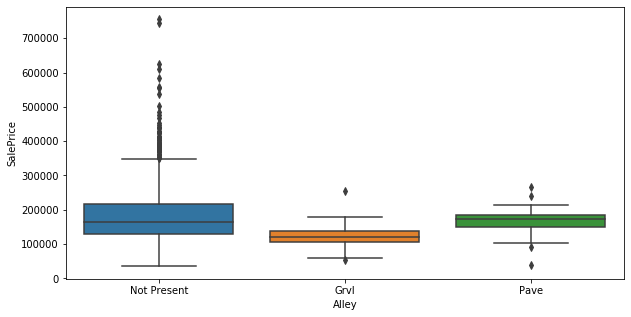

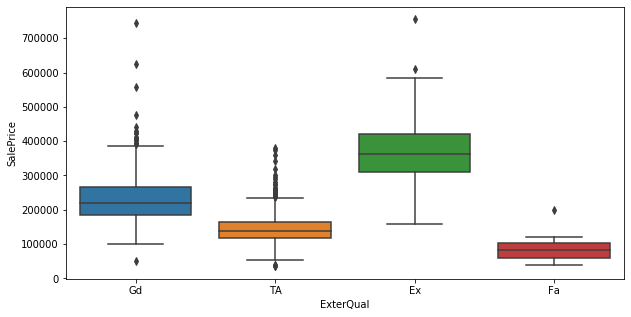

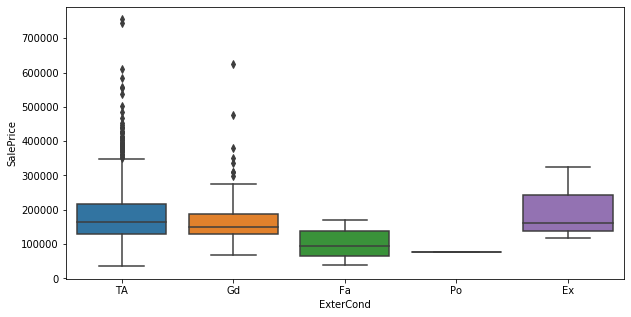

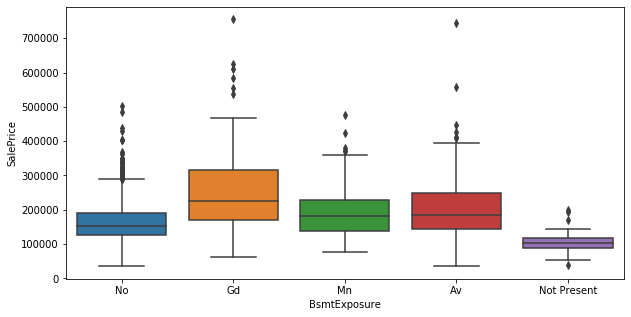

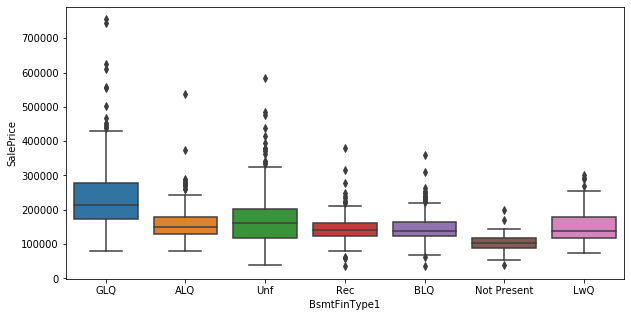

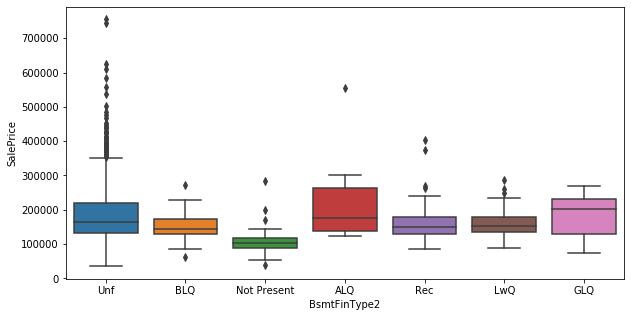

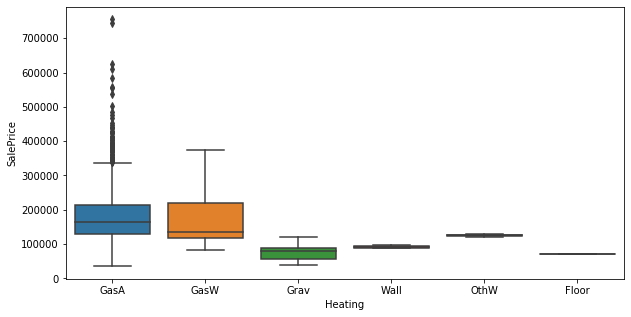

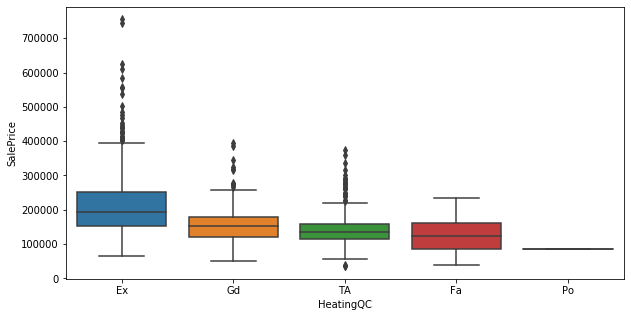

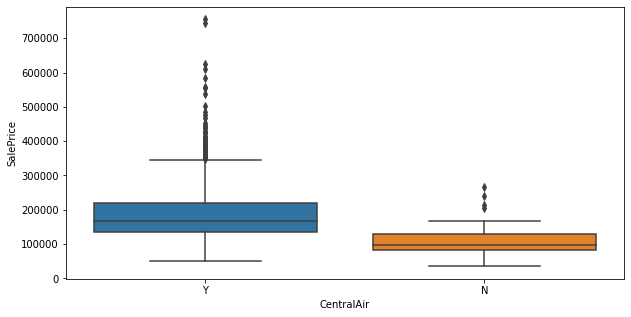

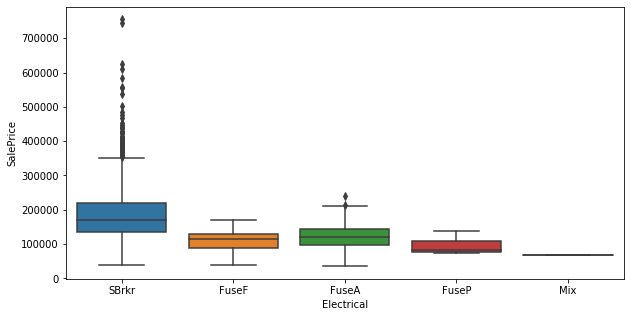

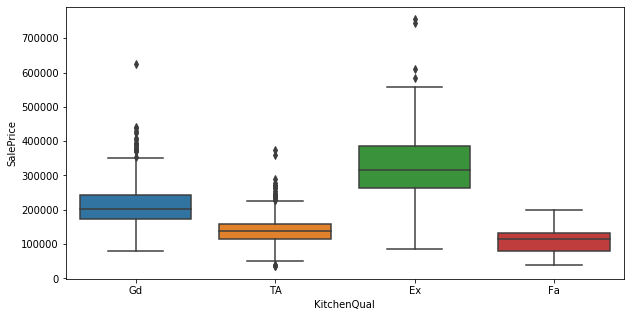

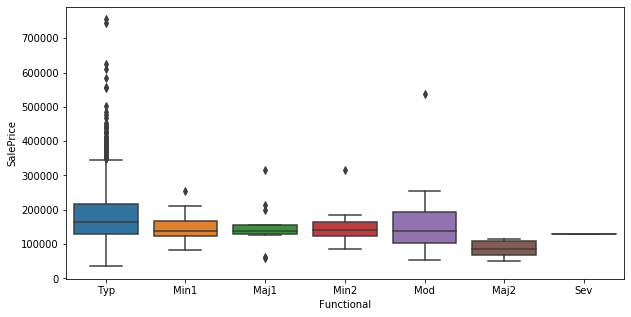

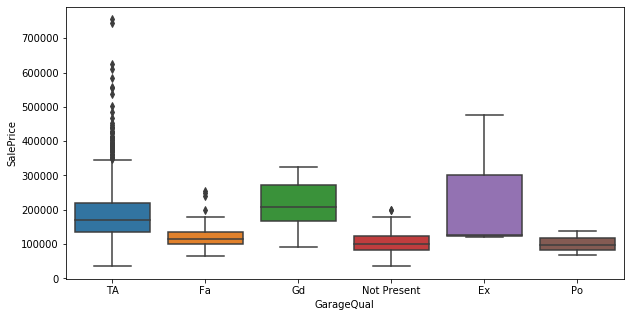

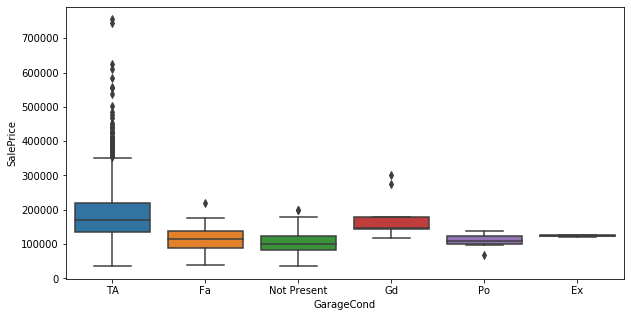

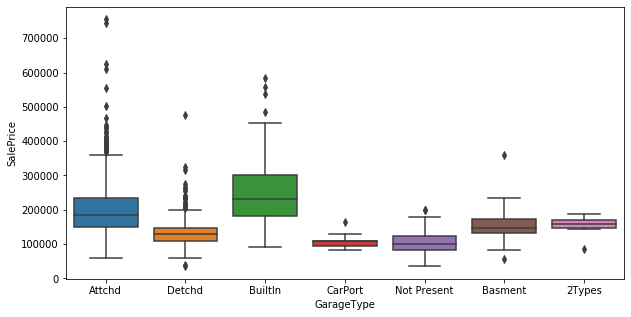

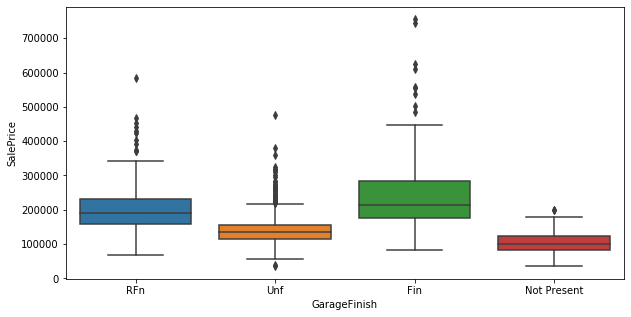

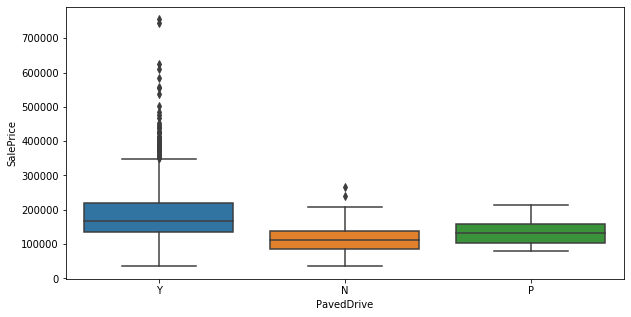

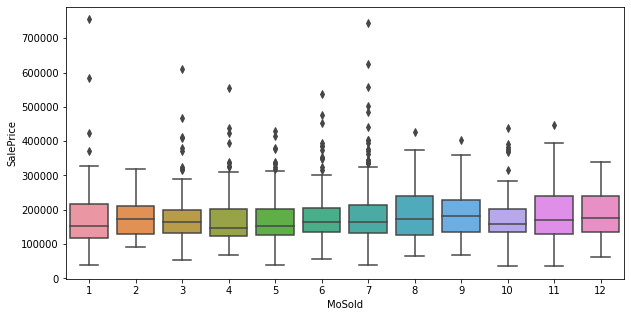

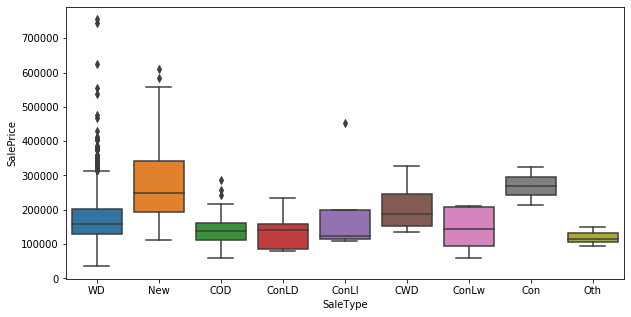

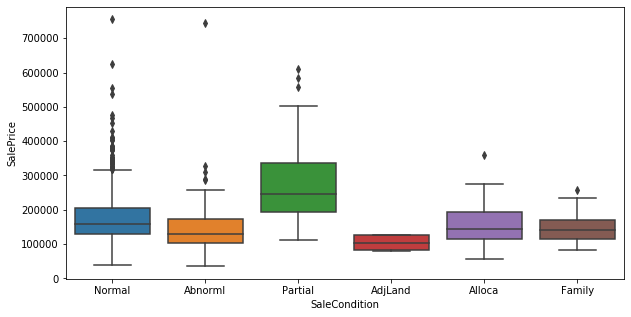

In [44]:
for index, col_name in enumerate(categorical_cols):
    draw_box_plot(index, col_name, 'SalePrice')

#### Checking Correlation

In [45]:
# Checking correlation with respect to SalePrice column
test=df.corr()['SalePrice']
test.sort_values(ascending=False)

SalePrice           1.000000
OverallQual         0.790085
GrLivArea           0.710073
GarageCars          0.639749
GarageArea          0.622484
TotalBsmtSF         0.613299
1stFlrSF            0.606969
FullBath            0.562710
TotRmsAbvGrd        0.536366
MasVnrArea          0.477486
Fireplaces          0.468973
BsmtFinSF1          0.383995
WoodDeckSF          0.324658
2ndFlrSF            0.322840
OpenPorchSF         0.311244
HalfBath            0.282331
LotArea             0.264668
BsmtFullBath        0.224988
BsmtUnfSF           0.215707
BedroomAbvGr        0.171956
ScreenPorch         0.113017
PoolArea            0.093102
3SsnPorch           0.045235
MoSold              0.045085
DiffYrSold          0.026165
BsmtFinSF2         -0.010350
BsmtHalfBath       -0.016021
MiscVal            -0.020961
LowQualFinSF       -0.025277
OverallCond        -0.076361
MSSubClass         -0.082760
EnclosedPorch      -0.128826
KitchenAbvGr       -0.137447
DiffYearRemodAdd   -0.507488
DiffYearBuilt 

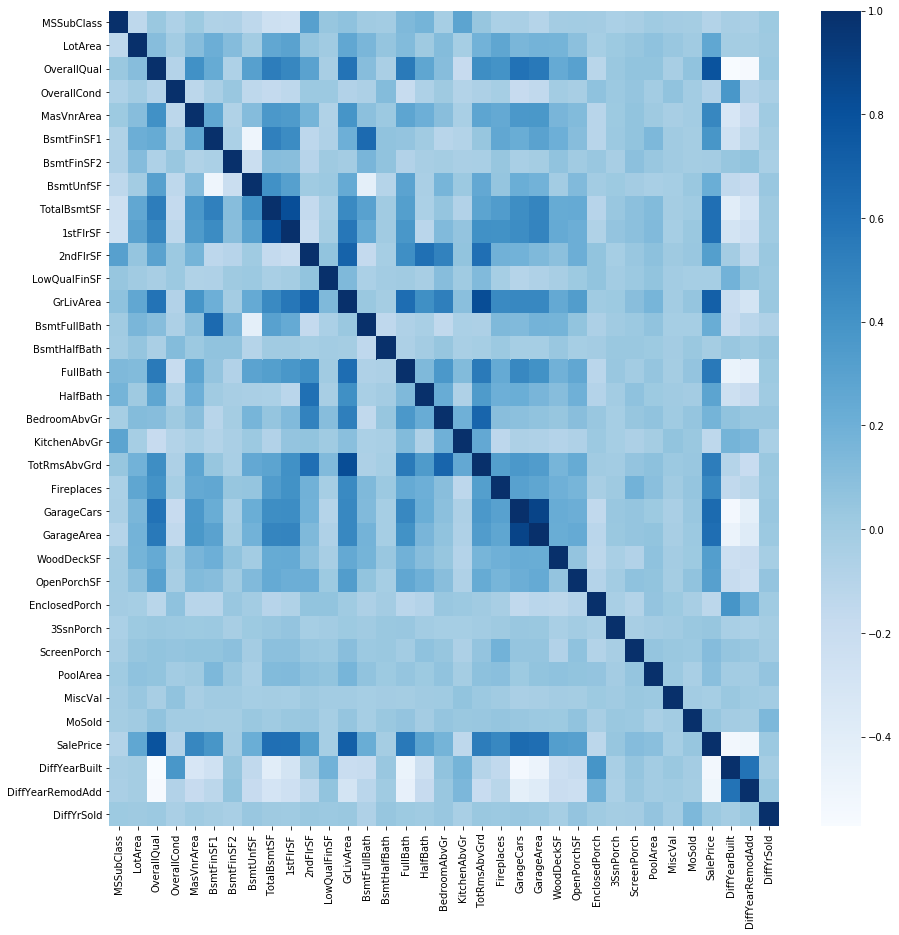

In [46]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='Blues')
plt.show()

**Top Correlated Features**

- OverallQual 
- GrLivArea
- GarageArea
- GarageCars
- TotalBsmtSF
- 1stFlrSF

#### Checking the distribution of target variable

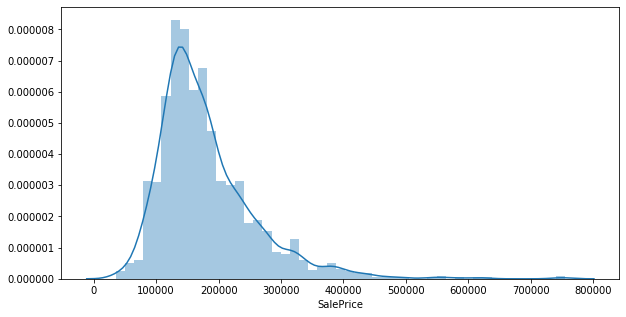

In [47]:
# dist plot for `SalePrice`
plt.figure(figsize=(10,5))
sns.distplot(df["SalePrice"])
plt.show()

- We can see `SalePrice` column has skewed data.
- To make it a `Normal distribution` we will take the log of `SalePrice` column.

In [48]:
df['SalePrice']=np.log(df['SalePrice'])

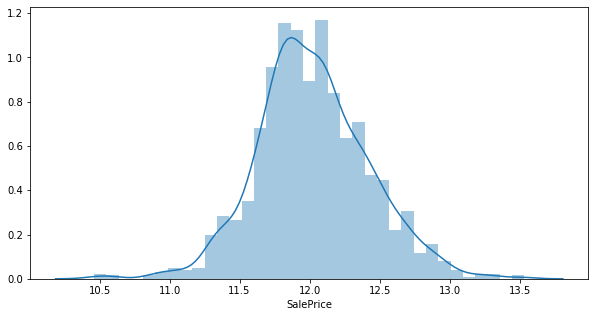

In [49]:
plt.figure(figsize=(10,5))
sns.distplot(df["SalePrice"])
plt.show()

In [50]:
df.shape

(1451, 78)

#### Dropping Outliers

In [51]:
def drop_outliers(df, num_col):
    list = []
    for col in num_col:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.95)
        IQR = Q3-Q1
        df =  df[(df[col] >= (Q1-(1.5*IQR))) & (df[col] <= (Q3+(1.5*IQR)))] 
    return df   

df = drop_outliers(df, numerical_cols)

### Creating dummy variables

In [52]:
# creating dummies & dropping first column
dummies = pd.get_dummies(df[categorical_cols], drop_first=True)

In [53]:
# adding dummy variables to the data frame
df = pd.concat([df, dummies], axis = 1)

In [54]:
# dropping original columns
df.drop(categorical_cols, axis = 1, inplace = True)

In [55]:
df.shape

(1258, 237)

#### Dividing dataset into train and test

In [56]:
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)

In [57]:
X.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,196.0,706,0,150,856,856,854,0,1710,...,0,0,0,0,1,0,0,0,1,0
1,9600,0.0,978,0,284,1262,1262,0,0,1262,...,0,0,0,0,1,0,0,0,1,0
2,11250,162.0,486,0,434,920,920,866,0,1786,...,0,0,0,0,1,0,0,0,1,0
3,9550,0.0,216,0,540,756,961,756,0,1717,...,0,0,0,0,1,0,0,0,0,0
4,14260,350.0,655,0,490,1145,1145,1053,0,2198,...,0,0,0,0,1,0,0,0,1,0


In [58]:
# Test Train split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

## Model Building & Evaluation

### Perform Simple Linear Regression

In [59]:
# linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
# predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.950645599424361


In [61]:
# predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8811984430423835


In [62]:
# model paramters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")

lin_reg_coef = pd.DataFrame(list(zip(cols,model_parameters)))
lin_reg_coef.columns = ['Feature','Coeff']
lin_reg_coef.sort_values(by='Coeff',ascending=False).head(10)

,Feature,Coeff
0,constant,11.030
31,MSZoning_FV,0.584
34,MSZoning_RM,0.528
33,MSZoning_RL,0.527
32,MSZoning_RH,0.488
185,Heating_Wall,0.477
127,RoofStyle_Shed,0.371
216,GarageType_CarPort,0.333
112,Exterior2nd_CmentBd,0.295
108,Exterior2nd_AsphShn,0.258


- R2 score on test set is poor as compared to the Train score.
- Let's perform more advanced regression techniques

### Ridge Regression

In [63]:
# list of alphas to tune
params = {
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
              1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [64]:
ridge = Ridge()

In [65]:
# 5-cross validation
folds = 5

model_ridge_cv = GridSearchCV(
    estimator = ridge, 
    param_grid = params, 
    scoring= 'neg_mean_absolute_error', 
    cv = folds, 
    return_train_score=True,
    verbose = 1)            

model_ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [66]:
# checking results
ridge_cv_results = pd.DataFrame(model_ridge_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=200]
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009602,0.002243,0.001596,0.000490,0.0001,{'alpha': 0.0001},-0.098944,-0.102710,-0.098220,-0.104454,...,-0.102220,0.003246,27,-0.058974,-0.060926,-0.059180,-0.061966,-0.059786,-0.060166,0.001127
1,0.007998,0.001553,0.001997,0.000633,0.001,{'alpha': 0.001},-0.098774,-0.102560,-0.098190,-0.104352,...,-0.102116,0.003251,26,-0.058982,-0.060936,-0.059179,-0.061971,-0.059795,-0.060172,0.001128
2,0.007602,0.001357,0.002199,0.000751,0.01,{'alpha': 0.01},-0.097401,-0.101212,-0.097909,-0.103368,...,-0.101200,0.003288,25,-0.059077,-0.061024,-0.059174,-0.062027,-0.059872,-0.060235,0.001134
3,0.011602,0.002330,0.001998,0.000635,0.05,{'alpha': 0.05},-0.094111,-0.097277,-0.097070,-0.099707,...,-0.098506,0.003426,23,-0.059678,-0.061397,-0.059315,-0.062361,-0.060137,-0.060578,0.001136
4,0.008202,0.001601,0.002196,0.000400,0.1,{'alpha': 0.1},-0.092231,-0.094817,-0.096371,-0.096440,...,-0.096563,0.003542,22,-0.060201,-0.061721,-0.059636,-0.062737,-0.060442,-0.060947,0.001125


In [67]:
# Plotting mean test and train scores
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

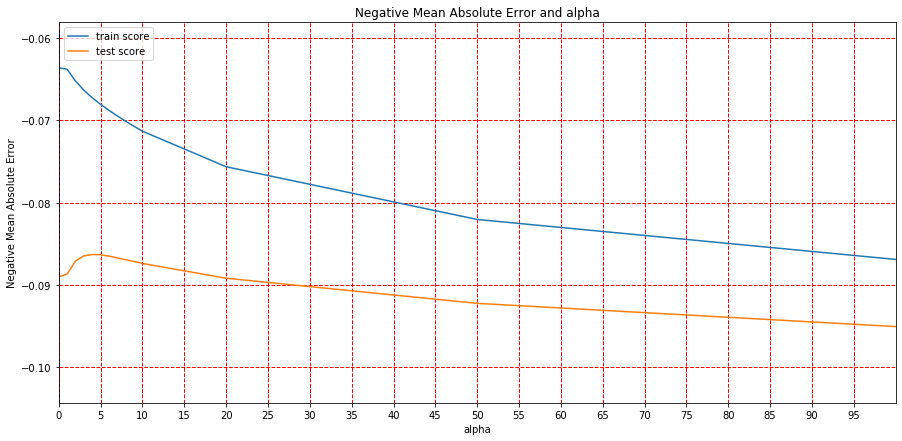

In [68]:
# plotting
plt.figure(figsize=(15,7))

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])

plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')

plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='--', linewidth=1)

plt.show()

In [69]:
model_ridge_cv.best_params_

{'alpha': 4.0}

In [70]:
# Choosing alpha as 4
alpha = 4

In [71]:
# fit model
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=4, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [72]:
pd.DataFrame(ridge.coef_, columns=['Ridge Coeff'])

,Ridge Coeff
0,0.000005
1,-0.000004
2,0.000077
3,0.000032
4,0.000011
...,...
231,0.042397
232,-0.023547
233,0.041409
234,0.097553


In [73]:
# train predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9406453305185204


In [74]:
# test predict
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.8977867637568159


In [75]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0,ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]

cols = X.columns
cols = cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameters)))
ridge_coef.columns = ['Feature','Coeff']

ridge_coef.sort_values(by='Coeff',ascending=False).head(10)

,Feature,Coeff
0,constant,11.112
47,Neighborhood_Crawfor,0.140
63,Neighborhood_StoneBr,0.130
203,Functional_Typ,0.128
190,CentralAir_Y,0.101
235,SaleCondition_Normal,0.098
96,Exterior1st_BrkFace,0.089
31,MSZoning_FV,0.083
146,MasVnrType_Stone,0.068
33,MSZoning_RL,0.062


In [76]:
print('Total number of features: ', ridge_coef.Coeff.size)
print('Num features with 0 coeff value: ', ridge_coef[ridge_coef.Coeff == 0].Coeff.size)

Total number of features:  237
Num features with 0 coeff value:  30


- Ridge regression model has calculated `30` features with coeffs value as `zero`.

### Lasso Regression

In [77]:
lasso = Lasso()

In [78]:
# 5-cross validation
folds = 5

model_lasso_cv = GridSearchCV(
    estimator = lasso, 
    param_grid = params, 
    scoring= 'neg_mean_absolute_error', 
    cv = folds, 
    return_train_score=True,
    verbose = 1)

model_lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [79]:
# checking results
cv_lasso_results = pd.DataFrame(model_lasso_cv.cv_results_)
cv_lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.108199,0.014246,0.002003,0.000633,0.0001,{'alpha': 0.0001},-0.085887,-0.090776,-0.093088,-0.086031,...,-0.090806,0.004638,2,-0.063204,-0.063612,-0.061919,-0.065814,-0.063154,-0.063541,0.001270
1,0.030797,0.028293,0.001602,0.000801,0.001,{'alpha': 0.001},-0.087440,-0.093302,-0.092344,-0.079475,...,-0.089942,0.006080,1,-0.077669,-0.076770,-0.077156,-0.079618,-0.074636,-0.077170,0.001601
2,0.010200,0.000748,0.002200,0.000399,0.01,{'alpha': 0.01},-0.100373,-0.113012,-0.105253,-0.089026,...,-0.105377,0.010415,3,-0.103446,-0.101081,-0.102494,-0.106943,-0.099470,-0.102687,0.002516
3,0.022201,0.003430,0.001999,0.000634,0.05,{'alpha': 0.05},-0.102156,-0.113537,-0.106235,-0.090505,...,-0.106618,0.010243,4,-0.105991,-0.102386,-0.104466,-0.109009,-0.100399,-0.104450,0.002961
4,0.041598,0.005886,0.001802,0.000401,0.1,{'alpha': 0.1},-0.102517,-0.113172,-0.106418,-0.090709,...,-0.106656,0.010046,5,-0.106057,-0.102581,-0.104613,-0.109088,-0.100570,-0.104582,0.002918


In [80]:
# plotting mean test and train scores
cv_lasso_results['param_alpha'] = cv_lasso_results['param_alpha'].astype('float32')

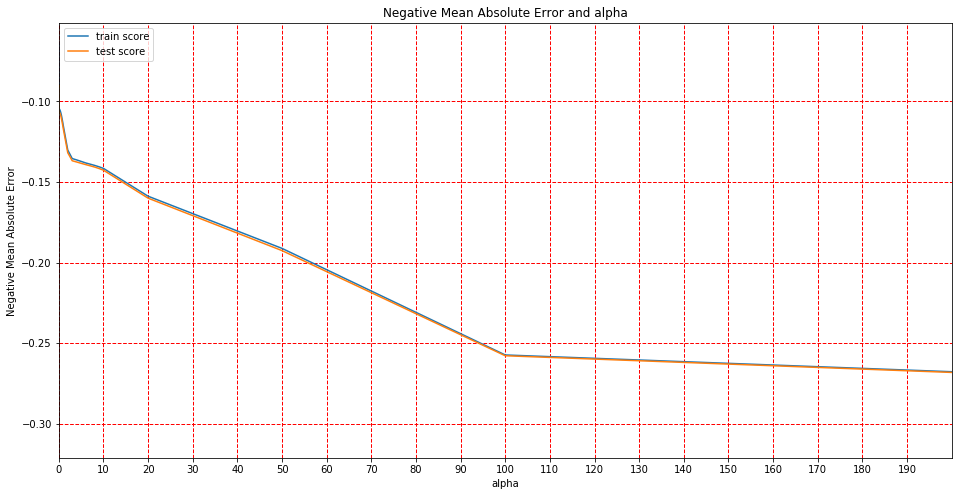

In [81]:
# plotting
plt.figure(figsize=(16,8))

plt.plot(cv_lasso_results['param_alpha'], cv_lasso_results['mean_train_score'])
plt.plot(cv_lasso_results['param_alpha'], cv_lasso_results['mean_test_score'])

plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')

plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='--', linewidth=1)

plt.show()

In [82]:
model_lasso_cv.best_params_

{'alpha': 0.001}

In [83]:
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [84]:
pd.DataFrame(lasso.coef_, columns=['Lasso Coeff'])

,Lasso Coeff
0,0.000006
1,0.000025
2,0.000158
3,0.000098
4,0.000080
...,...
231,0.000000
232,-0.000000
233,0.000000
234,0.078757


In [85]:
# predict on train set
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9206709719390953


In [86]:
# predict on test set
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9005176034614282


In [87]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0,lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]

cols = X.columns
cols = cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameters)))
lasso_coef.columns = ['Feature','Coeff']
lasso_coef.sort_values(by='Coeff',ascending=False).head(10)

,Feature,Coeff
0,const,11.042
47,Neighborhood_Crawfor,0.140
203,Functional_Typ,0.124
190,CentralAir_Y,0.107
63,Neighborhood_StoneBr,0.095
229,SaleType_New,0.082
235,SaleCondition_Normal,0.079
96,Exterior1st_BrkFace,0.058
31,MSZoning_FV,0.055
33,MSZoning_RL,0.039


In [88]:
print('Total number of features: ', lasso_coef.Coeff.size)
print('Num features with 0 coeff value: ', lasso_coef[lasso_coef.Coeff == 0].Coeff.size)

Total number of features:  237
Num features with 0 coeff value:  164


- Lasso regression model has calculated `164` features with coeffs value as `zero`.

## Summary

- R2 score of `Ridge` on `Train` set: `0.940`
- R2 score of `Ridge` on `Test` set: `0.897`


- R2 score of `Lasso` on `Train` set: `0.920`
- R2 score of `Lasso` on `Test` set: `0.90`


- Best value of alpha for ridge regression: `4`
- Best value of alpha for Lasso regression: `0.001`

- We get similary R2 scores for both `Ridge` & `Lasso` on test set, which is nearly equaly to `90 %`.

- **But `Lasso` penalizes more when # of features is high and indeed helps in feature elimination.**

- **We will consider `Lasso` as our final model.**

**Most significant variables for predicting the price of a house are -**


- Neighborhood_Crawfor
- Functional_Typ
- CentralAir_Y
- Neighborhood_StoneBr
- SaleType_New
- SaleCondition_Normal
- Exterior1st_BrkFace
- MSZoning_FV
- MSZoning_RL